<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="camtasia" color="#0099cc">
Diamond
</font>
</h1>

<h2 align=left style="line-height:200%;font-family:camtasia;color:#0099cc">
<font face="camtasia" color="#0099cc">
Introduction Of Problem
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: left;line-height:200%;font-family:camtasia;font-size:medium">
<font face="camtasia" size=4>
     😊🎉 Regression 😊🎉
    <br>
My goal in this problem is to predict the price of diamonds based on a number of their characteristics. To solve this problem, we will use the linear regression algorithm
</font>
</p>

<h2 align=left style="line-height:200%;font-family:camtasia;color:#0099cc">
<font face="camtasia" color="#0099cc">
Import required libraries
    </font>
</h2>

In [17]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

<h2 align=left style="line-height:200%;font-family:camtasia;color:#0099cc">
<font face="camtasia" color="#0099cc">
Introducing the Dataset
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: left;line-height:200%;font-family:camtasia;font-size:medium">
<font face="camtasia" size=3>
The educational data set we have includes 10 columns, the descriptions of each column are given in the table below
    </font>
</p>

<center>
<div dir=rtl style="direction: rtl;line-height:200%;font-family:camtasia;font-size:medium">
<font face="camtasia" size=4>
    
|Features|Description|
|:------:|:---:|
|Diamond weight in carats|<code>carat</code>|
|Diamond cutting quality|<code>cut</code>|
|Color of Diamond from J(The worst) to D(The best)|<code>color</code>|
|Diamond clarity rating from worst to best (I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF)|<code>clarity</code>|
|Diamond length in millimeters|<code>x</code>|
|Diamond width in millimeters|<code>y</code>|
|Diamond depth in millimeters|<code>z</code>|
|The percentage depth that is equal to: z / mean(x,y)|<code>depth</code>|
|The width of the widest point of the Diamond|<code>table</code>|
|Diamond Price|<code>price</code>|

</font>
</div>
</center>

<h2 align=left style="line-height:200%;font-family:camtasia;color:#0099cc">
<font face="camtasia" color="#0099cc">
Reading the Dataset
</font>
</h2>

In [18]:
train = pd.read_csv('diamonds_train.csv')
train.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<h2 align=left style="line-height:200%;font-family:camtasia;color:#0099cc">
<font face="camtasia" color="#0099cc">
First Step Of Preprocessing
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: left;line-height:200%;font-family:camtasia;font-size:medium">
<font face="camtasia" size=3>
.In this step, we explore the different dimensions of the dataset, outlier data, and data leakage
</font>
</p>

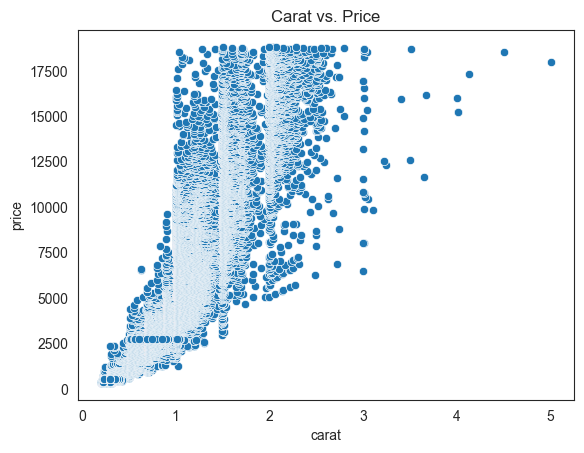

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

class RelationshipPlotter:
    
    def __init__(self, data):
        self.data = data
    
    def plot(self, x, y, plot_type):
        if plot_type == 'scatter':
            sns.scatterplot(data=self.data, x=x, y=y)
        elif plot_type == 'box':
            sns.boxplot(data=self.data, x=x, y=y)
        plt.title(f"{x.capitalize()} vs. {y.capitalize()}")
        plt.show()

plotter = RelationshipPlotter(data=train)

# Plot the relationships between 'carat', 'cut', 'color', and 'clarity' and 'price'
plotter.plot(x='carat', y='price', plot_type='scatter')

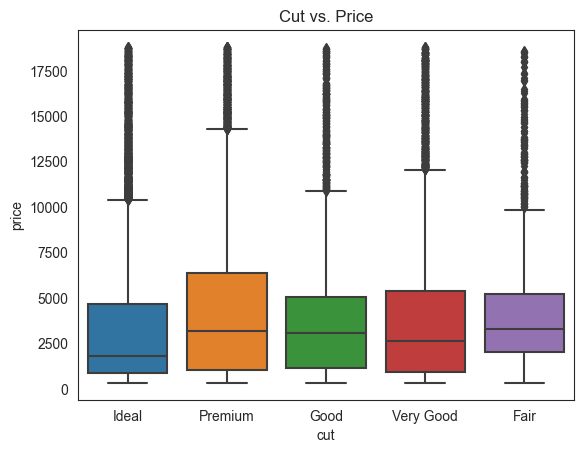

In [20]:
plotter.plot(x='cut', y='price', plot_type='box')

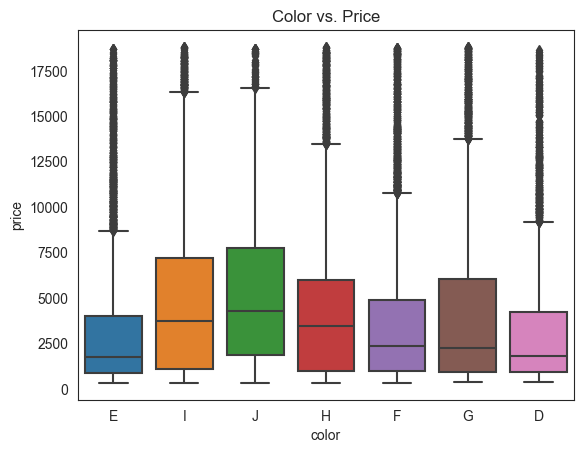

In [21]:
plotter.plot(x='color', y='price', plot_type='box')

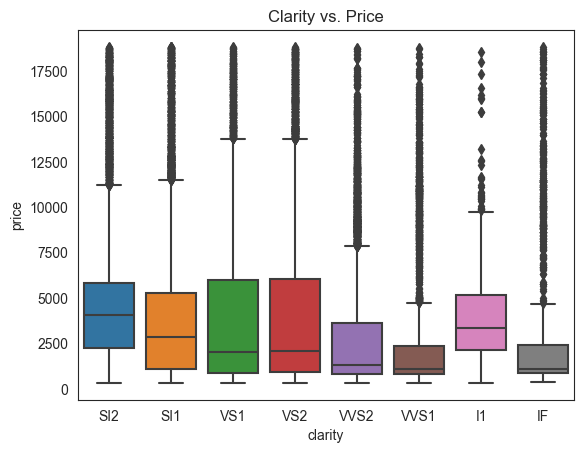

In [22]:
plotter.plot(x='clarity', y='price', plot_type='box')

In [23]:
#Drops all rows where the specified column has a value of 0.
def drop_rows_with_zero(df, col):
    index = df[df[col] == 0].index
    return df.drop(index, inplace=False)

train = drop_rows_with_zero(train, 'x')
train = drop_rows_with_zero(train, 'z')

In [24]:
# drop duplicated row 
train= train.drop_duplicates(keep='first')

In [25]:
Y=train['price']
X= train.drop(columns=['price'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

<h2 align=left style="line-height:200%;font-family:camrasia;color:#0099cc">
<font face="camtasia" color="#0099cc">
Second step Of Preprocessing
    </font>
</h2>

<p dir=rtl style="direction: rtl;text-align: left;line-height:200%;font-family:camtasia;font-size:medium">
<font face="camtasia" size=3>
Managing Missing values and feature engineering in both groups of categorical and numerical features
    <br>

</font>
</p>

In [26]:
#cOne-hot encodes the 'cut', 'color', and 'clarity' columns in the input dataframes.
def encode_categorical_features(df_train, df_test):

    for col in ['cut', 'color', 'clarity']:
        dummies = pd.get_dummies(df_train[col], dtype=int)
        df_train = pd.concat([df_train, dummies], axis=1)
        df_train = df_train.drop(labels=col, axis=1)
        dummies = pd.get_dummies(df_test[col], dtype=int)
        df_test = pd.concat([df_test, dummies], axis=1)
        df_test = df_test.drop(labels=col, axis=1)
    return df_train, df_test

# Encode the categorical features in the training and test sets
X_train, X_test = encode_categorical_features(X_train, X_test)



In [27]:
#Drops the 'x', 'y', and 'z' columns from the input dataframe.
def drop_columns(df):
    return df.drop(labels=['x', 'y', 'z'], axis=1)

X_train = drop_columns(X_train)
X_test = drop_columns(X_test)

In [28]:
# Feature scaling
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)



<h2 align=left style="line-height:200%;font-family:camtasia;color:#0099cc">
<font face="camtasia" color="#0099cc">
Modeling and Evaluating
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align:left justify; line-height:200%; font-family:camtasia; font-size:medium">
<font face="camtasia" size=3>
Now that the data has been cleaned and we've added or removed features, it's time to train a model that can predict the target variable for this problem </font>
</p>

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create a LinearRegression object
lr = LinearRegression()
lr.fit(scaled_X_train,y_train)


# Evaluate the model on the test set
y_pred = lr.predict(scaled_X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Test set MSE:", mse)
print("Test set MSE:", mae)
print("Test set R^2:", r2)

Test set MSE: 1256889.4013515082
Test set MSE: 792.9705274804243
Test set R^2: 0.9191736118515442


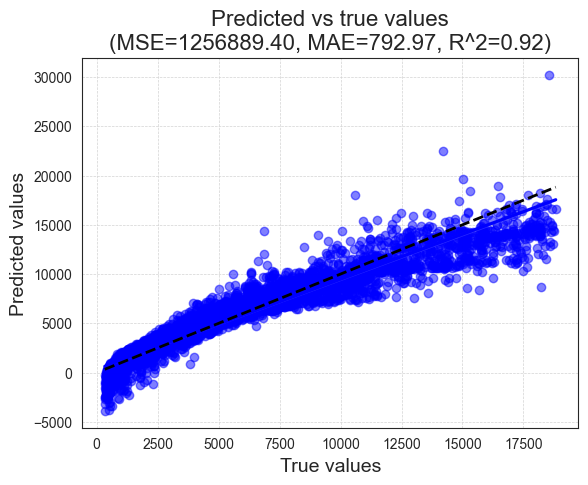

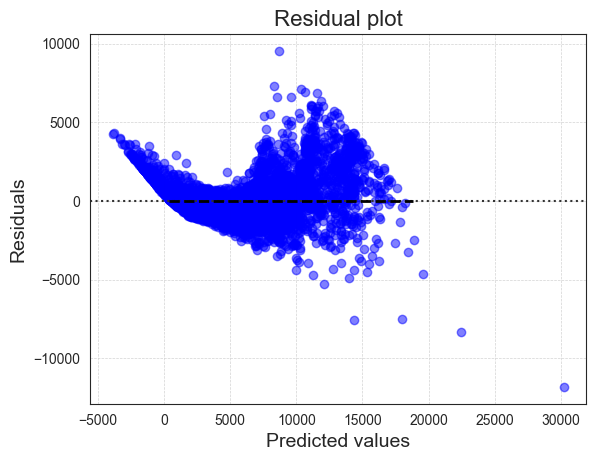

In [30]:


# Plot the predicted vs true values
sns.set_style('white')
sns.regplot(x=y_test, y=y_pred, color='blue', scatter_kws={'alpha':0.5})
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True values', fontsize=14)
plt.ylabel('Predicted values', fontsize=14)
plt.title('Predicted vs true values\n(MSE={:.2f}, MAE={:.2f}, R^2={:.2f})'.format(mse, mae, r2), fontsize=16)
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.show()

# Plot the residuals vs predicted values
residuals = y_test - y_pred
sns.set_style('white')
sns.residplot(x=y_pred, y=residuals, color='blue', scatter_kws={'alpha':0.5})
plt.plot([y_test.min(), y_test.max()], [0, 0], 'k--', lw=2)
plt.xlabel('Predicted values', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residual plot', fontsize=16)
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.show()

In [31]:
param = {
    'n_neighbors': range(2,20),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

GS = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=param, scoring='r2', cv=5)
GS.fit(scaled_X_train, y_train)

print(f"Best R2 score: {GS.best_score_}")
print(f"Best hyperparameters: {GS.best_params_}")
y_pred = GS.best_estimator_.predict(scaled_X_test)
test_r2 = r2_score(y_test, y_pred)
print(f"R2 score on test set: {test_r2}")

Best R2 score: 0.9322532966974704
Best hyperparameters: {'n_neighbors': 4, 'p': 2, 'weights': 'distance'}
R2 score on test set: 0.9378859379987372


In [32]:
model_knn = KNeighborsRegressor(n_neighbors=4, p= 2, weights= 'distance')
model_knn.fit(scaled_X_train,y_train)


# Evaluate the model on the test set
y_pred = model_knn.predict(scaled_X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Test set MSE:", mse)
print("Test set MSE:", mae)
print("Test set R^2:", r2)

Test set MSE: 965903.6855746127
Test set MSE: 496.0921202149477
Test set R^2: 0.9378859379987372


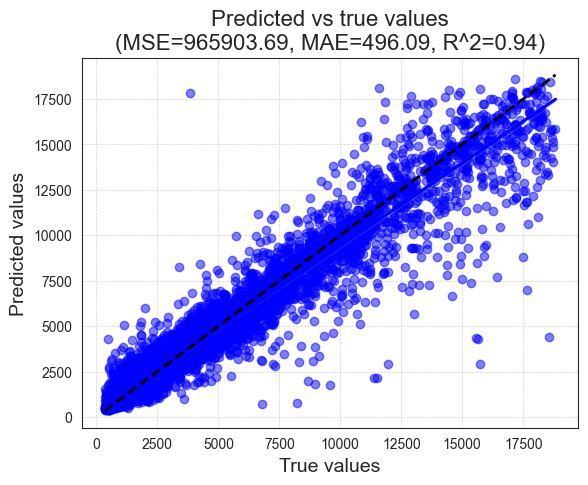

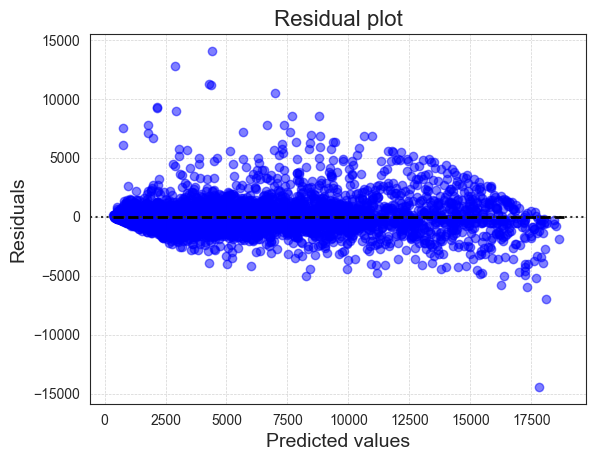

In [33]:
# Plot the predicted vs true values
sns.set_style('white')
sns.regplot(x=y_test, y=y_pred, color='blue', scatter_kws={'alpha':0.5})
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True values', fontsize=14)
plt.ylabel('Predicted values', fontsize=14)
plt.title('Predicted vs true values\n(MSE={:.2f}, MAE={:.2f}, R^2={:.2f})'.format(mse, mae, r2), fontsize=16)
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.show()

# Plot the residuals vs predicted values
residuals = y_test - y_pred
sns.set_style('white')
sns.residplot(x=y_pred, y=residuals, color='blue', scatter_kws={'alpha':0.5})
plt.plot([y_test.min(), y_test.max()], [0, 0], 'k--', lw=2)
plt.xlabel('Predicted values', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residual plot', fontsize=16)
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.show()

In [34]:
param = {
    'max_depth': range(5,25,5),
    'min_samples_split': range(5,45,5),
    'min_samples_leaf': range(2,20,2)
}

GS = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=param, scoring='r2', cv=5)
GS.fit(scaled_X_train, y_train)


print(f"Best R2 score: {GS.best_score_}")
print(f"Best hyperparameters: {GS.best_params_}")

y_pred = GS.best_estimator_.predict(scaled_X_test)
test_r2 = r2_score(y_test, y_pred)
print(f"R2 score on test set: {test_r2}")

Best R2 score: 0.9762850780775365
Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 8, 'min_samples_split': 30}
R2 score on test set: 0.9771144917756747


In [40]:
# Create a DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth= 20, min_samples_leaf= 8, min_samples_split= 30)
dt.fit(scaled_X_train,y_train)

# Evaluate the model on the test set
y_pred = dt.predict(scaled_X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Test set MSE:", mse)
print("Test set MSE:", mae)
print("Test set R^2:", r2)

Test set MSE: 355886.3218697861
Test set MSE: 311.0389748539624
Test set R^2: 0.9771141311580452


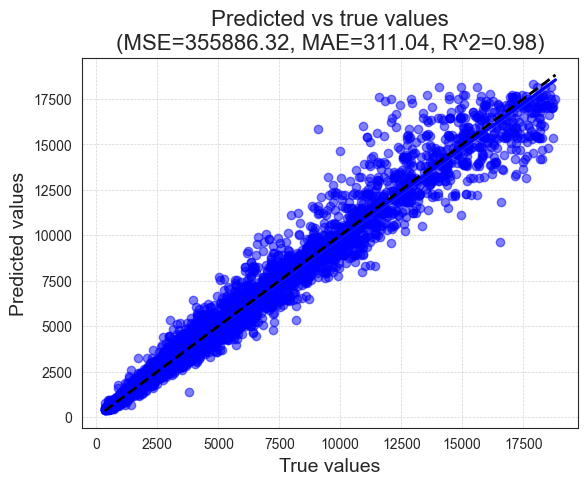

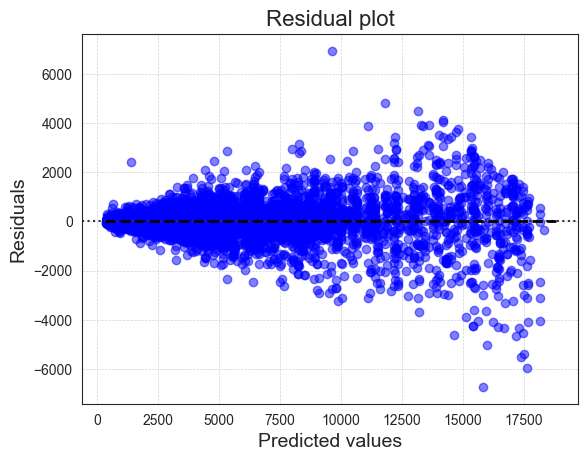

In [41]:
#Plot the predicted vs true values
sns.set_style('white')
sns.regplot(x=y_test, y=y_pred, color='blue', scatter_kws={'alpha':0.5})
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True values', fontsize=14)
plt.ylabel('Predicted values', fontsize=14)
plt.title('Predicted vs true values\n(MSE={:.2f}, MAE={:.2f}, R^2={:.2f})'.format(mse, mae, r2), fontsize=16)
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.show()

# Plot the residuals vs predicted values
residuals = y_test - y_pred
sns.set_style('white')
sns.residplot(x=y_pred, y=residuals, color='blue', scatter_kws={'alpha':0.5})
plt.plot([y_test.min(), y_test.max()], [0, 0], 'k--', lw=2)
plt.xlabel('Predicted values', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residual plot', fontsize=16)
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.show()

In [47]:
# Create a DecisionTreeRegressor
RF_model = RandomForestRegressor()
RF_model.fit(scaled_X_train,y_train)

# Evaluate the model on the test set
y_pred = RF_model.predict(scaled_X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Test set MSE:", mse)
print("Test set MSE:", mae)
print("Test set R^2:", r2)

Test set MSE: 307648.78198253986
Test set MSE: 284.41184529975936
Test set R^2: 0.9802161273385054


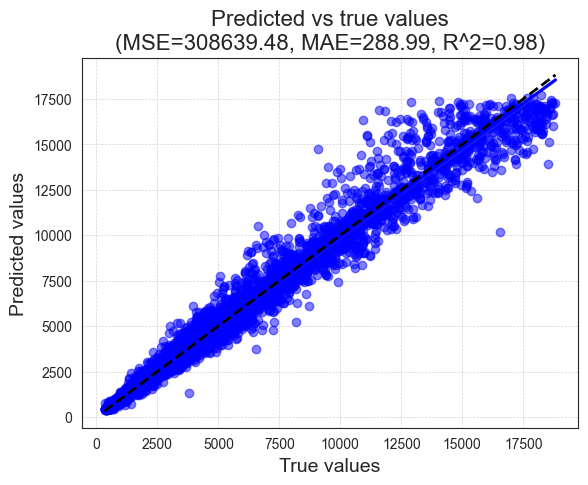

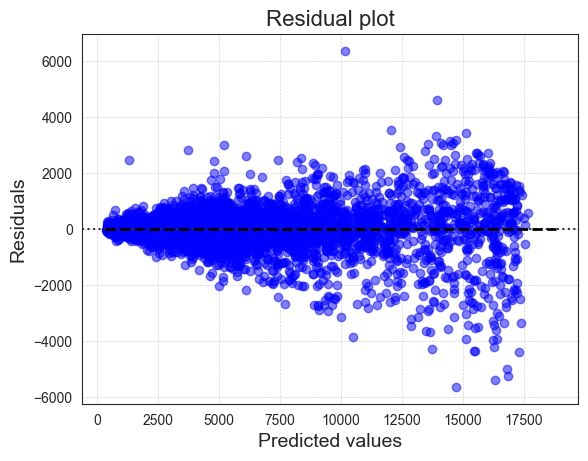

In [44]:
# Plot the predicted vs true values
sns.set_style('white')
sns.regplot(x=y_test, y=y_pred, color='blue', scatter_kws={'alpha':0.5})
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True values', fontsize=14)
plt.ylabel('Predicted values', fontsize=14)
plt.title('Predicted vs true values\n(MSE={:.2f}, MAE={:.2f}, R^2={:.2f})'.format(mse, mae, r2), fontsize=16)
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.show()

# Plot the residuals vs predicted values
residuals = y_test - y_pred
sns.set_style('white')
sns.residplot(x=y_pred, y=residuals, color='blue', scatter_kws={'alpha':0.5})
plt.plot([y_test.min(), y_test.max()], [0, 0], 'k--', lw=2)
plt.xlabel('Predicted values', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Residual plot', fontsize=16)
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.show()